In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
import pandas as pd

In [2]:
fs = 1000        # Sampling frequency (Hz)
t = np.arange(0, 1, 1/fs)  # 1 second signal

In [3]:
def clean_signal():
    freq = 50  # Base frequency
    signal = np.sin(2 * np.pi * freq * t)
    return signal

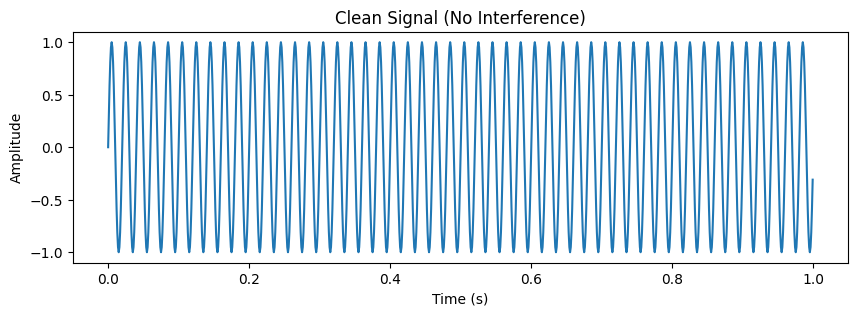

In [4]:
signal = clean_signal()
plt.figure(figsize=(10,3))
plt.plot(t, signal)
plt.title("Clean Signal (No Interference)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

In [5]:
def narrowband_rfi():
    base = clean_signal()
    rfi_freq = 200  # Interference frequency
    rfi = 0.5 * np.sin(2 * np.pi * rfi_freq * t)
    return base + rfi

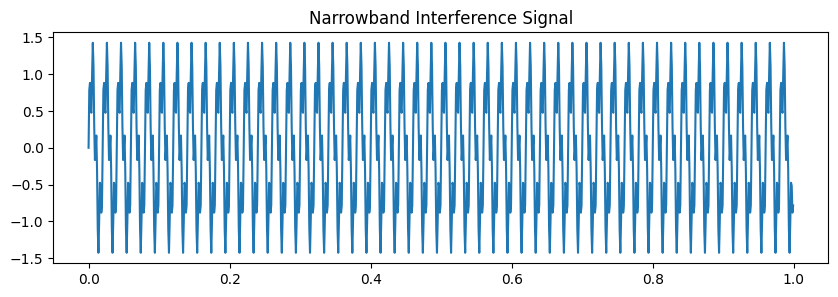

In [6]:
signal = narrowband_rfi()
plt.figure(figsize=(10,3))
plt.plot(t, signal)
plt.title("Narrowband Interference Signal")
plt.show()

In [7]:
def broadband_rfi():
    base = clean_signal()
    noise = 0.5 * np.random.normal(0, 1, len(t))
    return base + noise

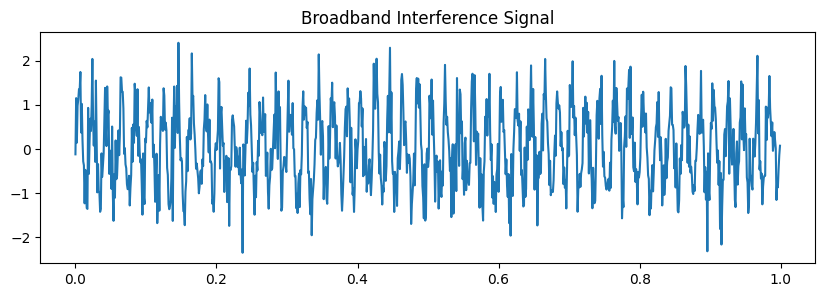

In [8]:
signal = broadband_rfi()
plt.figure(figsize=(10,3))
plt.plot(t, signal)
plt.title("Broadband Interference Signal")
plt.show()

In [9]:
def impulsive_rfi():
    base = clean_signal()
    impulses = np.zeros(len(t))
    impulses[np.random.randint(0, len(t), 5)] = 3
    return base + impulses

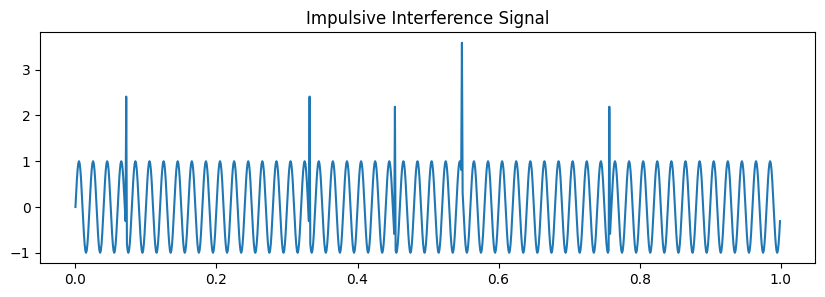

In [10]:
signal = impulsive_rfi()
plt.figure(figsize=(10,3))
plt.plot(t, signal)
plt.title("Impulsive Interference Signal")
plt.show()

In [11]:
np.save("../data/raw_signals/clean.npy", clean_signal())
np.save("../data/raw_signals/narrowband.npy", narrowband_rfi())
np.save("../data/raw_signals/broadband.npy", broadband_rfi())
np.save("../data/raw_signals/impulsive.npy", impulsive_rfi())

In [12]:
def extract_features(signal):
    fft_vals = np.abs(np.fft.fft(signal))
    freqs = np.fft.fftfreq(len(fft_vals), 1/fs)

    features = {
        "mean": np.mean(signal),
        "variance": np.var(signal),
        "max_amplitude": np.max(signal),
        "peak_frequency": freqs[np.argmax(fft_vals)],
        "spectral_energy": np.sum(fft_vals**2)
    }
    return features

In [13]:
data = []

signals = {
    0: clean_signal(),
    1: narrowband_rfi(),
    2: broadband_rfi(),
    3: impulsive_rfi()
}

for label, sig in signals.items():
    feat = extract_features(sig)
    feat["label"] = label
    data.append(feat)

df = pd.DataFrame(data)
df

,mean,variance,max_amplitude,peak_frequency,spectral_energy,label
0,-1.714184e-16,0.500000,1.000000,-50.0,500000.000000,0
1,-2.002842e-16,0.625000,1.426585,50.0,625000.000000,1
2,-2.263691e-02,0.768596,2.286849,50.0,769107.955166,2
3,1.500000e-02,0.543629,3.809017,-50.0,543854.101966,3


In [14]:
df.to_csv("../data/processed/features.csv", index=False)